Code by fabio.springer.freitas@gmail.com
data available at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Simple data exploration with seaborn and pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart= pd.read_csv(r"C:\Users\fabio\OneDrive\Documentos\testePython\Heart\heart_2020_cleaned.csv\heart_2020_cleaned.csv")
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Variables descriptions:

HeartDiease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

BMI: Body Mass Index (BMI)

Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

AlcholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per wee

Stroke: (Ever told) (you had) a stroke?

PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days how many was your physical healthnot good?

MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

DiffWalking: Do you have serious difficulty walking or climbing stairs?

Sex: Are you male or female?

AgeCategory: Fourteen-level age category

Race: Imputed race/ethnicity value

Diabetic: (Ever told) (you had) diabetes?

PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

GenHealth:Would you say that in general your health is...

SleepTime: On average, how many hours of sleep do you get in a 24-hour period?

Asthma: (Ever told) (you had) asthma?

KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer: (Ever told) (you had) skin cancer?







In [16]:
heart.describe().round(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.00,319795.00,319795.00,319795.00
mean,28.33,3.37,3.90,7.10
std,6.36,7.95,7.96,1.44
min,12.02,0.00,0.00,1.00
25%,24.03,0.00,0.00,6.00
50%,27.34,0.00,0.00,7.00
75%,31.42,2.00,3.00,8.00
max,94.85,30.00,30.00,24.00


The maximum of average sleep time should not be 24hrs. That is a common problem when people fill in formularies. 

In [10]:
# How many categories are there for each categorical variable?
print(heart.drop(['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime'], axis=1).nunique())
print(f"There are {heart['Diabetic'].nunique()} categories in Diabetic wich are: {heart['Diabetic'].unique()} ")


HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64
There are 4 categories in Diabetic wich are: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 


In [12]:
#lets take a quick look at categorical variables counts where people have Hearth diseases

print(f"There are {len(heart[heart['HeartDisease']=='Yes'])} people with heart diseases.") 

heart.drop(['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime'], axis = 1)[heart['HeartDisease'] == 'Yes'].value_counts().head(25)


There are 27373 people with heart diseases.


HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex     AgeCategory  Race   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer
Yes           Yes      No               No      No           Male    70-74        White  No        Yes               Good       No      No             No            133
              No       No               No      No           Male    65-69        White  No        Yes               Very good  No      No             No            127
              Yes      No               No      No           Male    70-74        White  No        Yes               Very good  No      No             No            124
                                                                     65-69        White  No        Yes               Very good  No      No             No            119
                                                                                                                     Good       No      No             No         

Let’s begin data visualization with our numeric variables


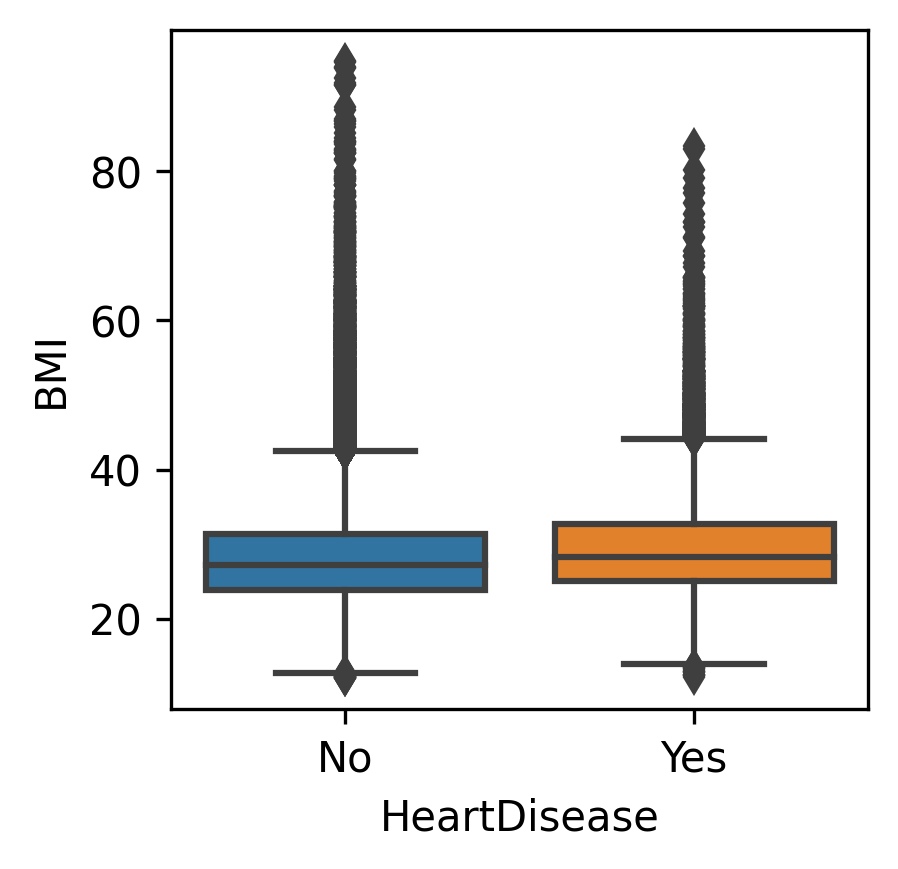

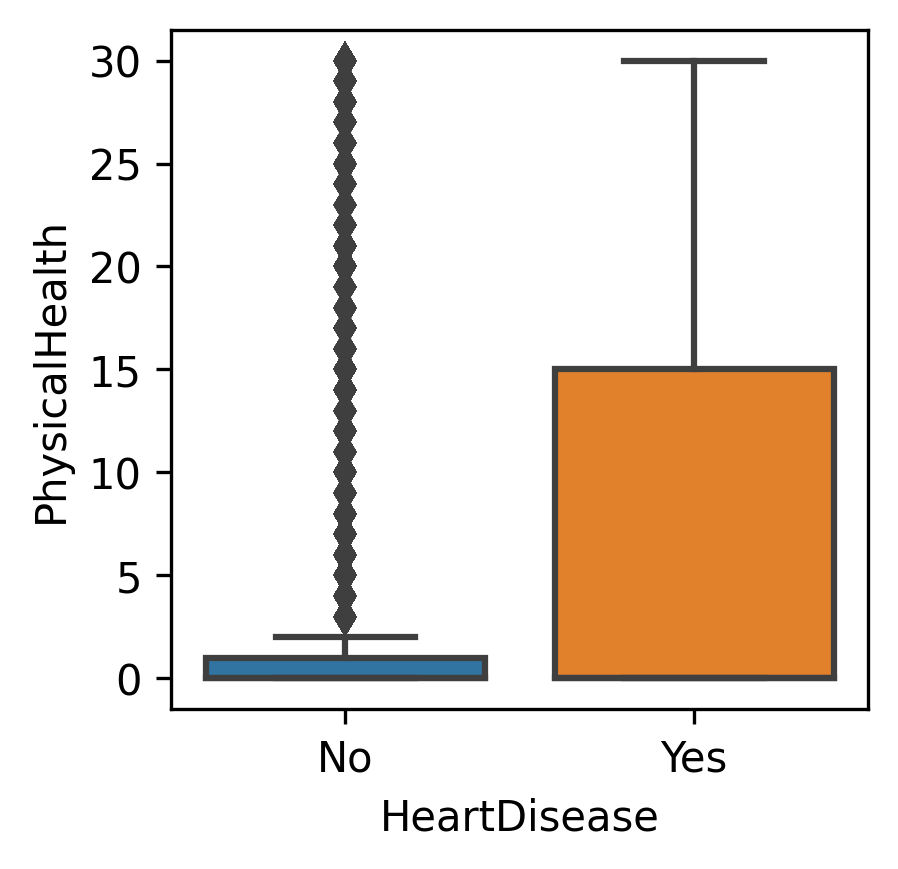

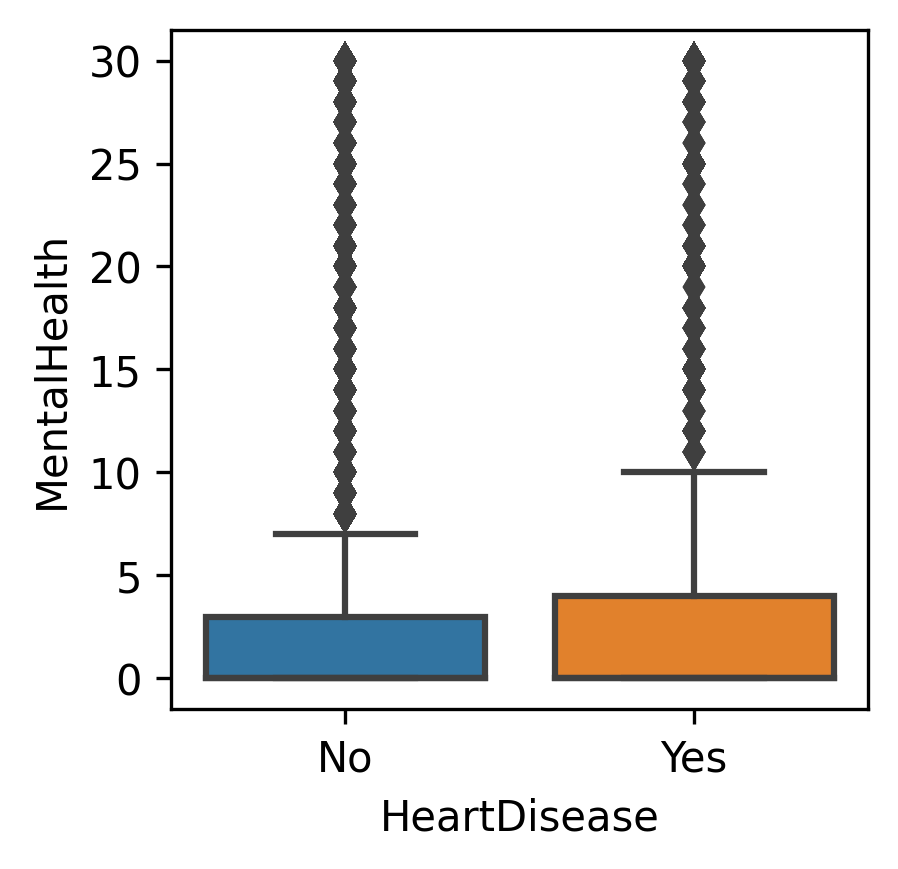

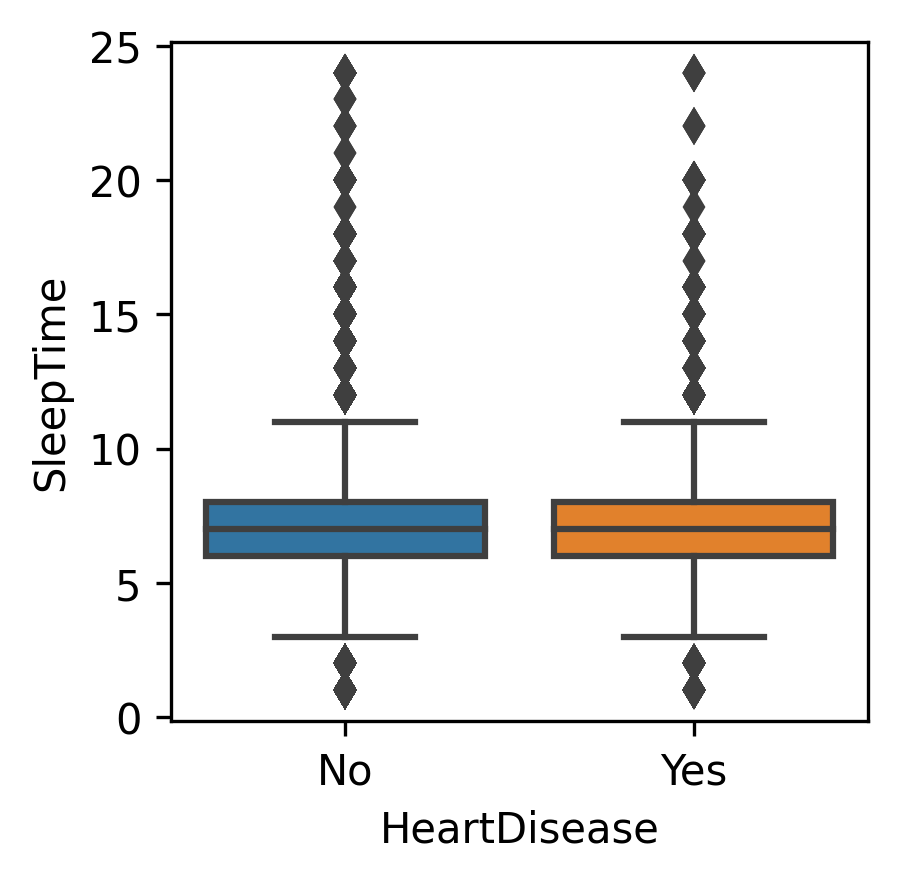

In [25]:
numeric_variables = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for i in numeric_variables:
    plt.figure(figsize=(3, 3), dpi=300)
    sns.boxplot(data = heart, x = 'HeartDisease', y = i)
    plt.show()

BMI has a bigger median for those that have heart diseases, but both groups have a lot of outliers. People with worse physical health had more hearth diseases, however it is not clear what causes what. Those with bad mental health also had more hearth problems, but not as much as those with physical health problems. Sleep time is not much different between the group with and without heart problems. 

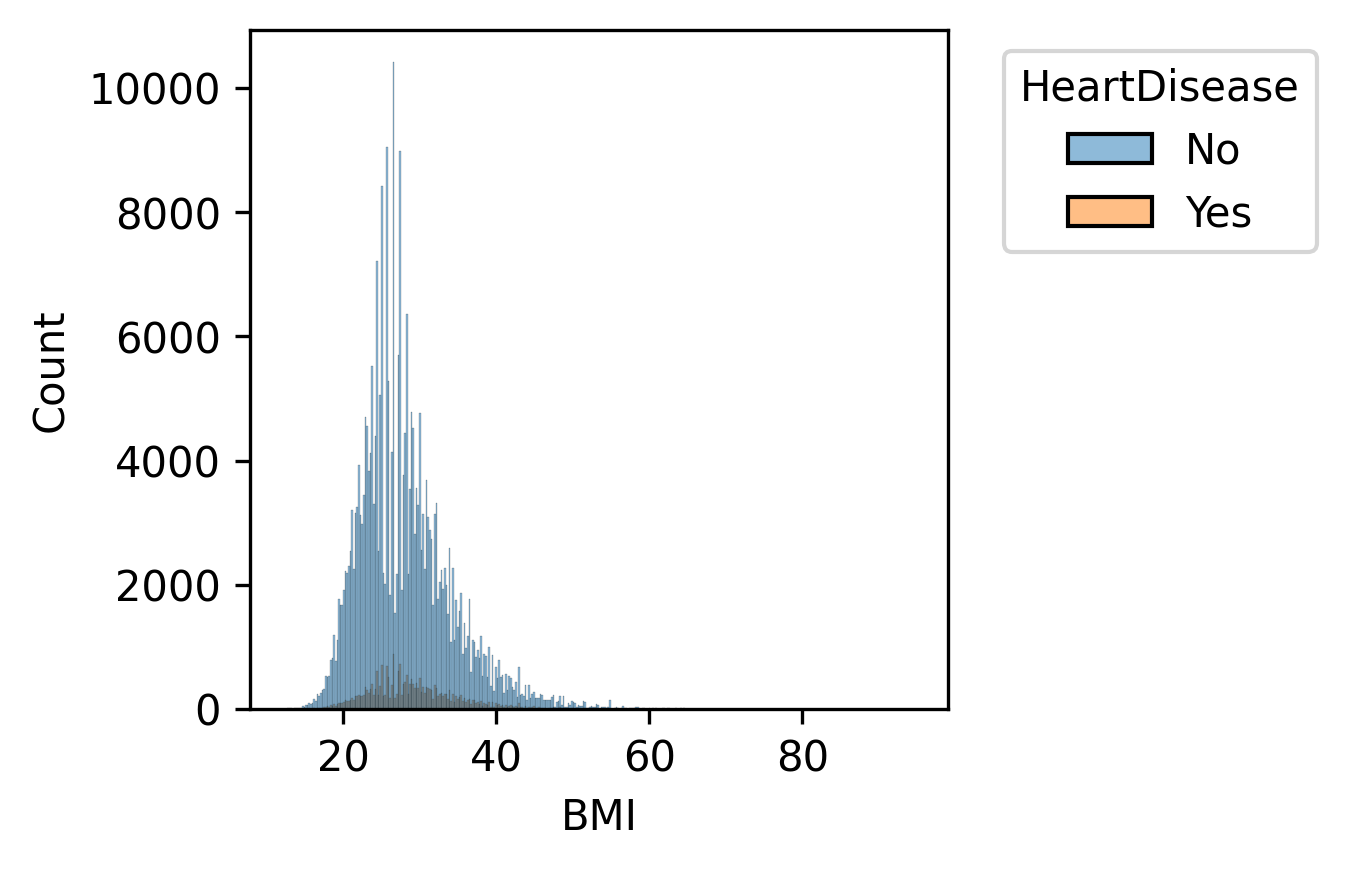

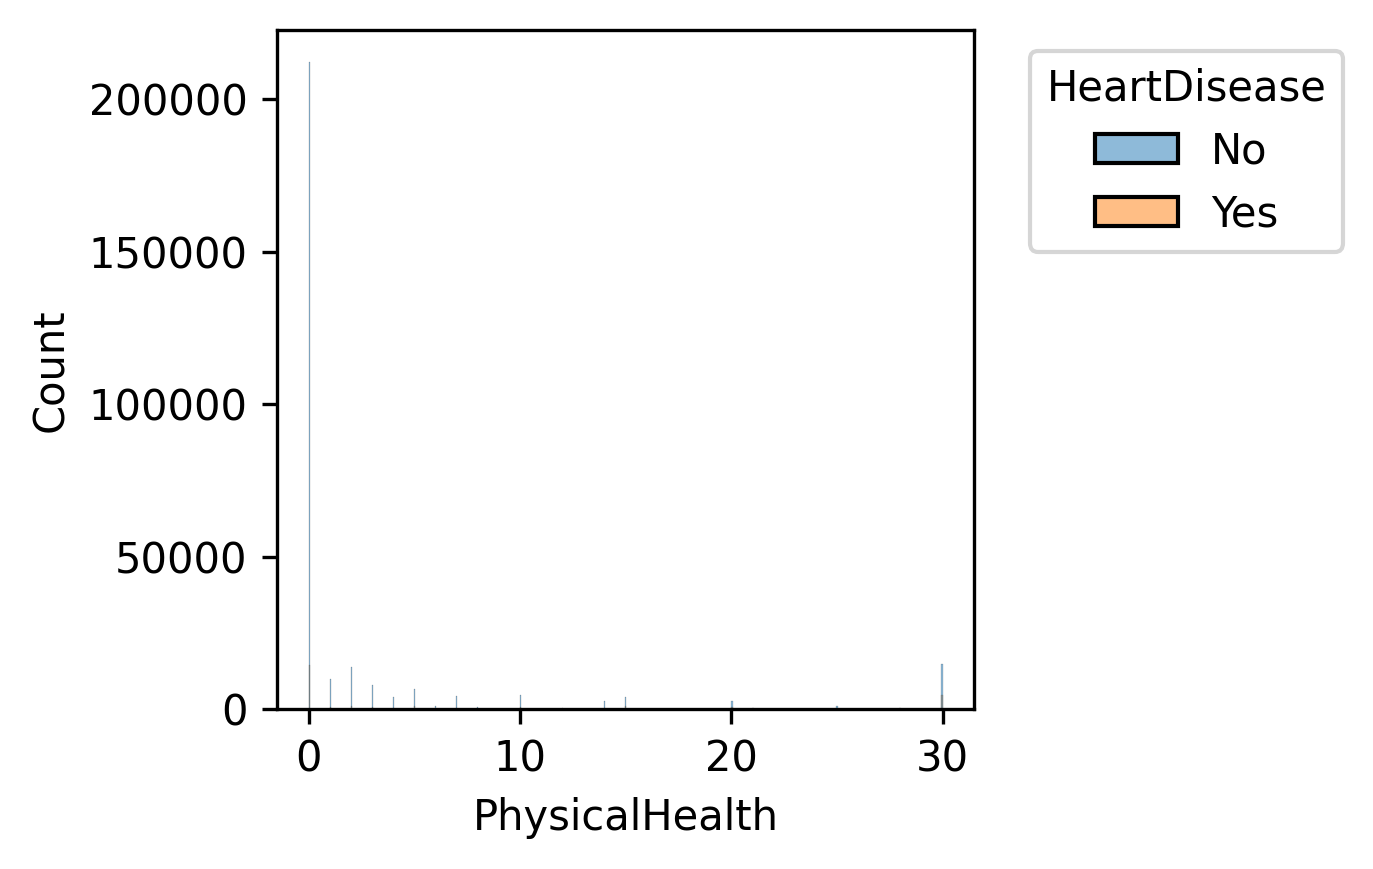

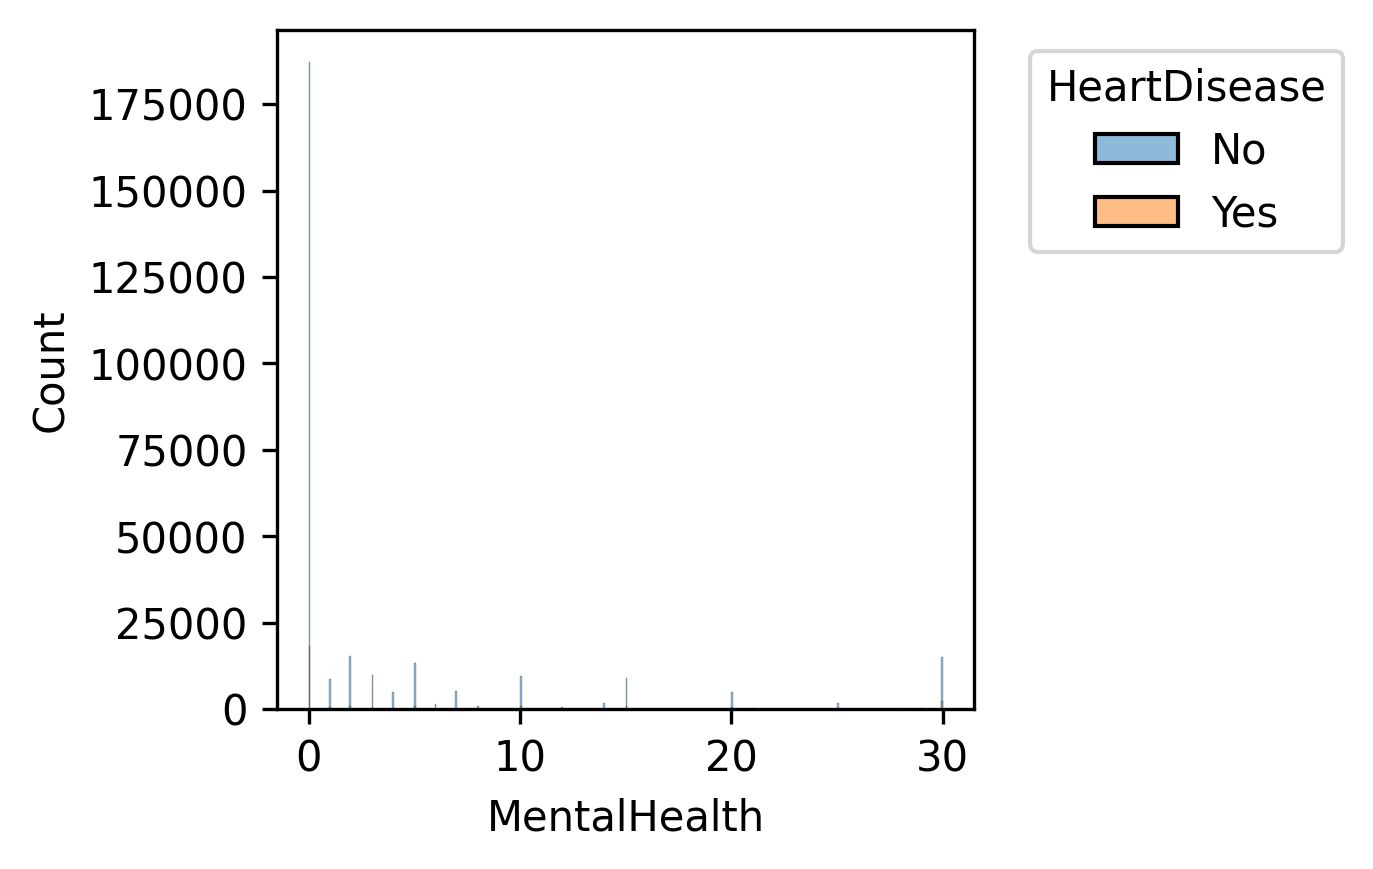

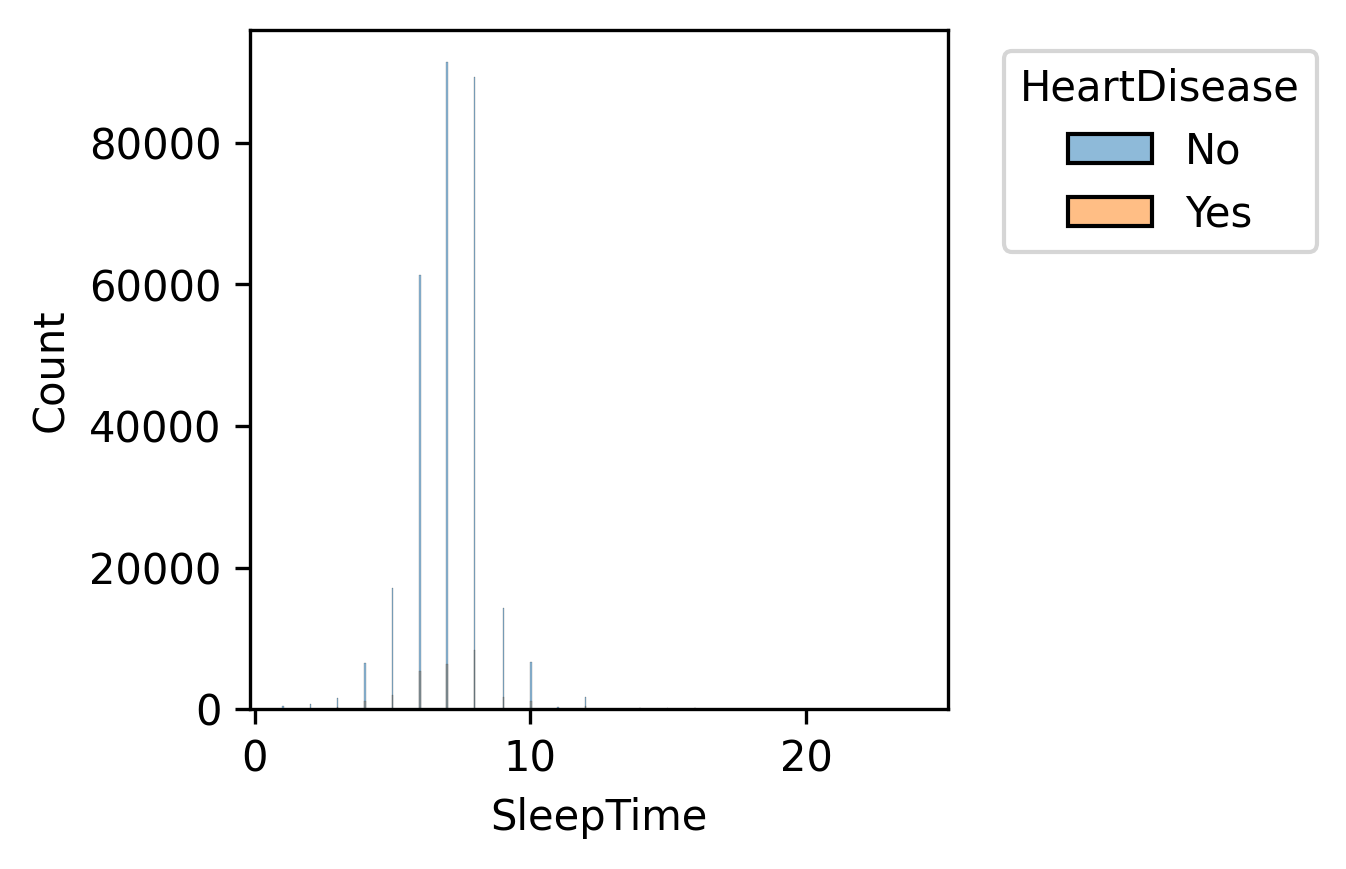

In [26]:
# Distribution of numeric variables

for i in numeric_variables:
    plt.figure(figsize=(3, 3), dpi=300)
    hist = sns.histplot(data = heart, x = i , hue= "HeartDisease")
    sns.move_legend(hist,"upper left", bbox_to_anchor = (1.05,1))
    plt.show()



Lets look at some categorical variables

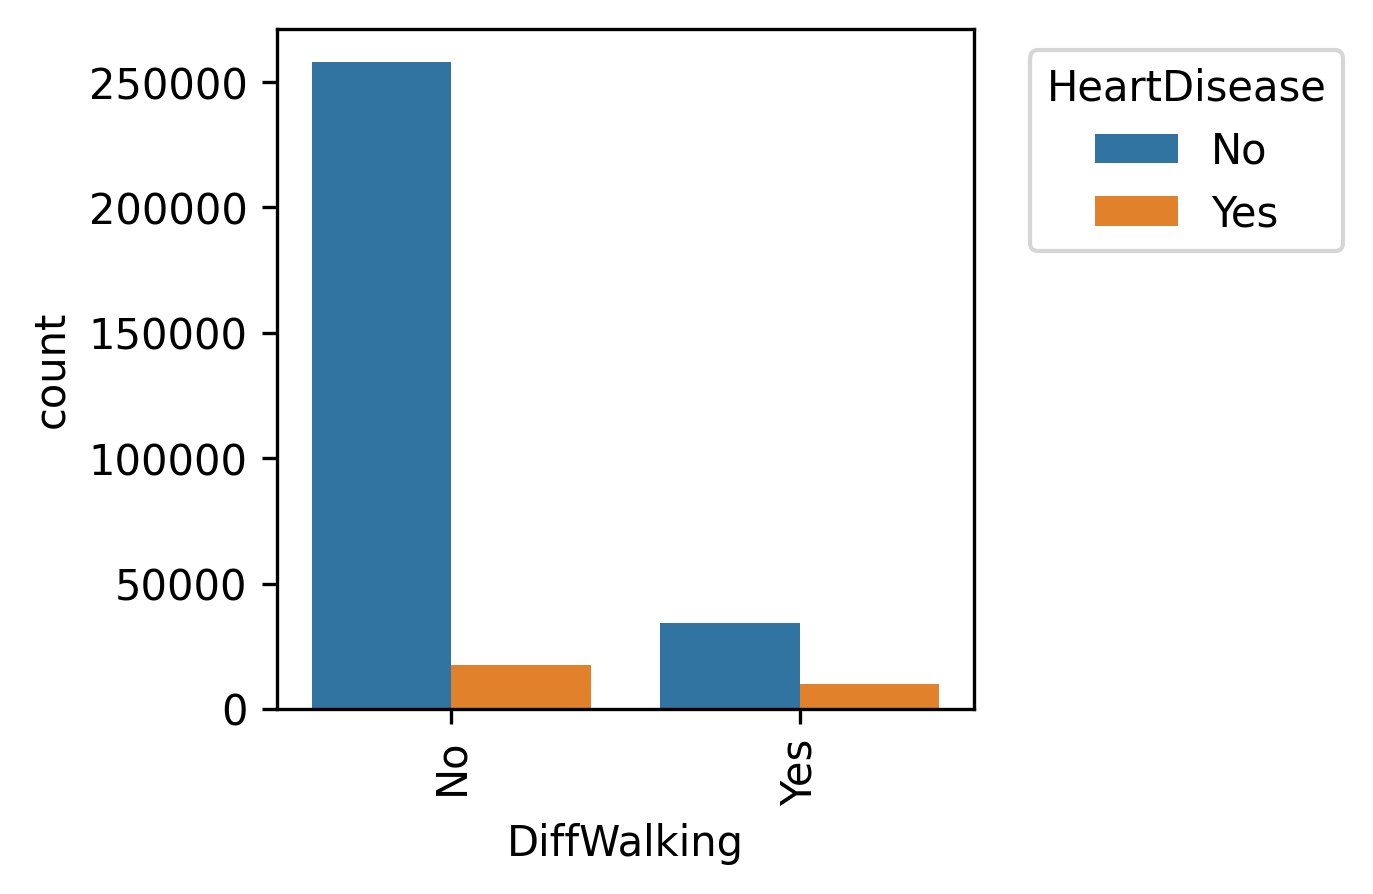

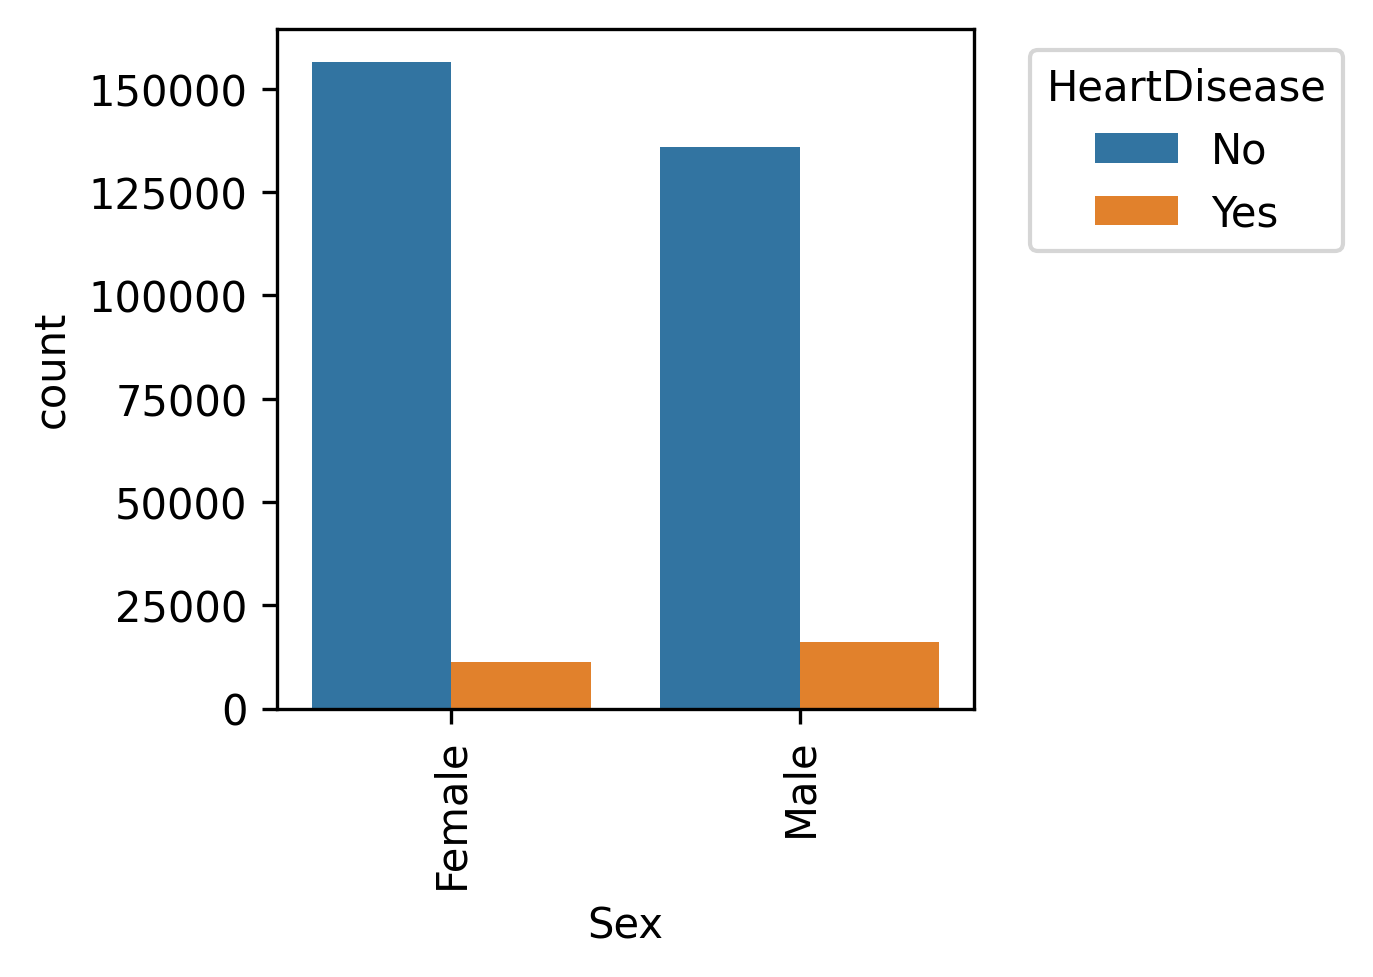

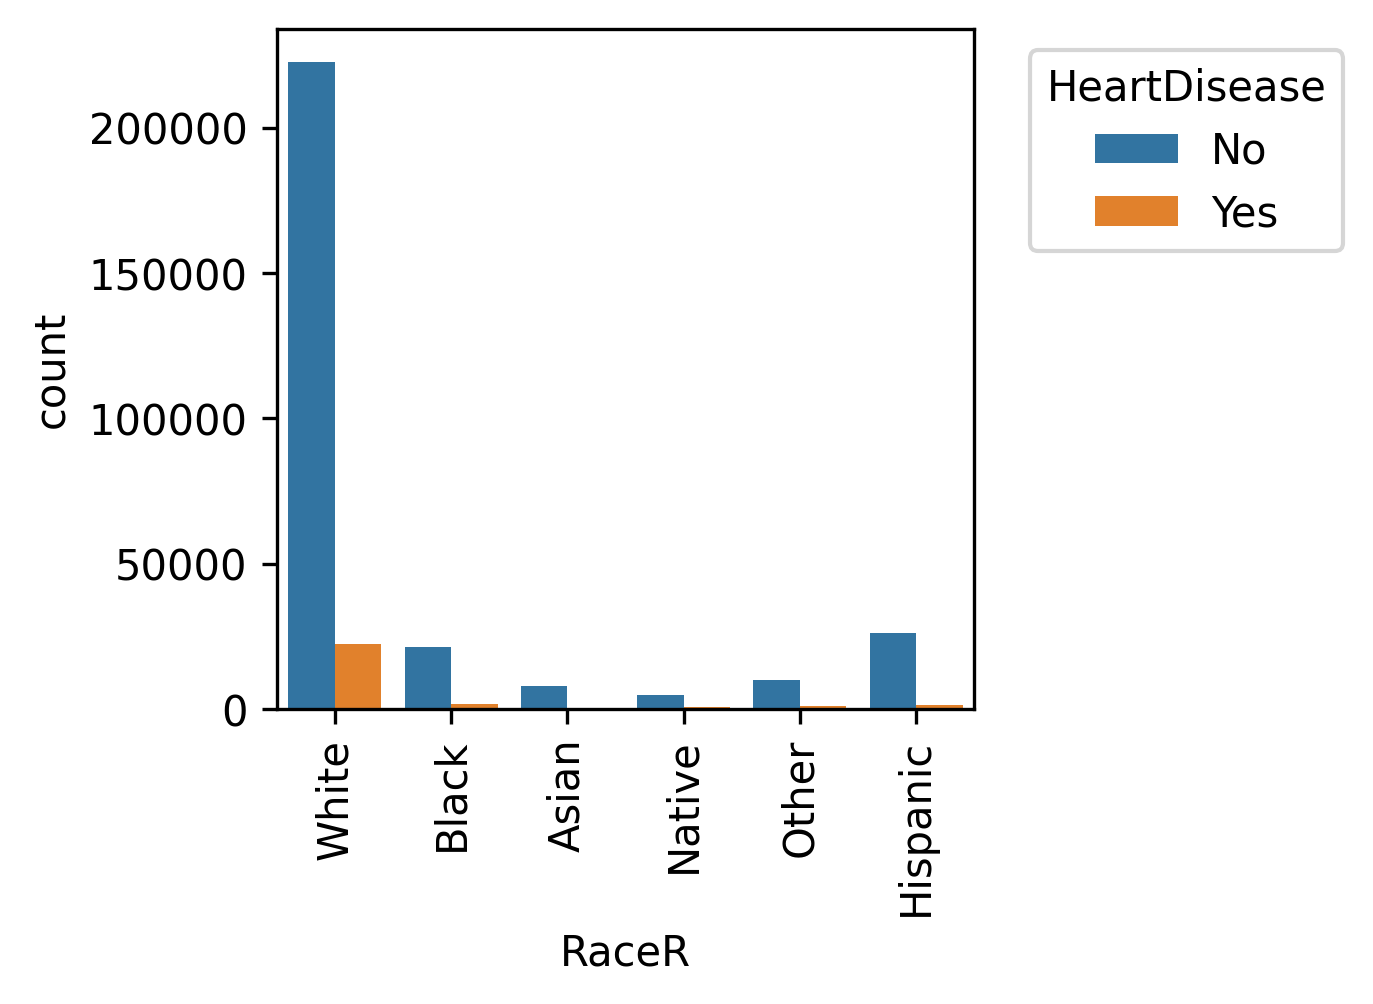

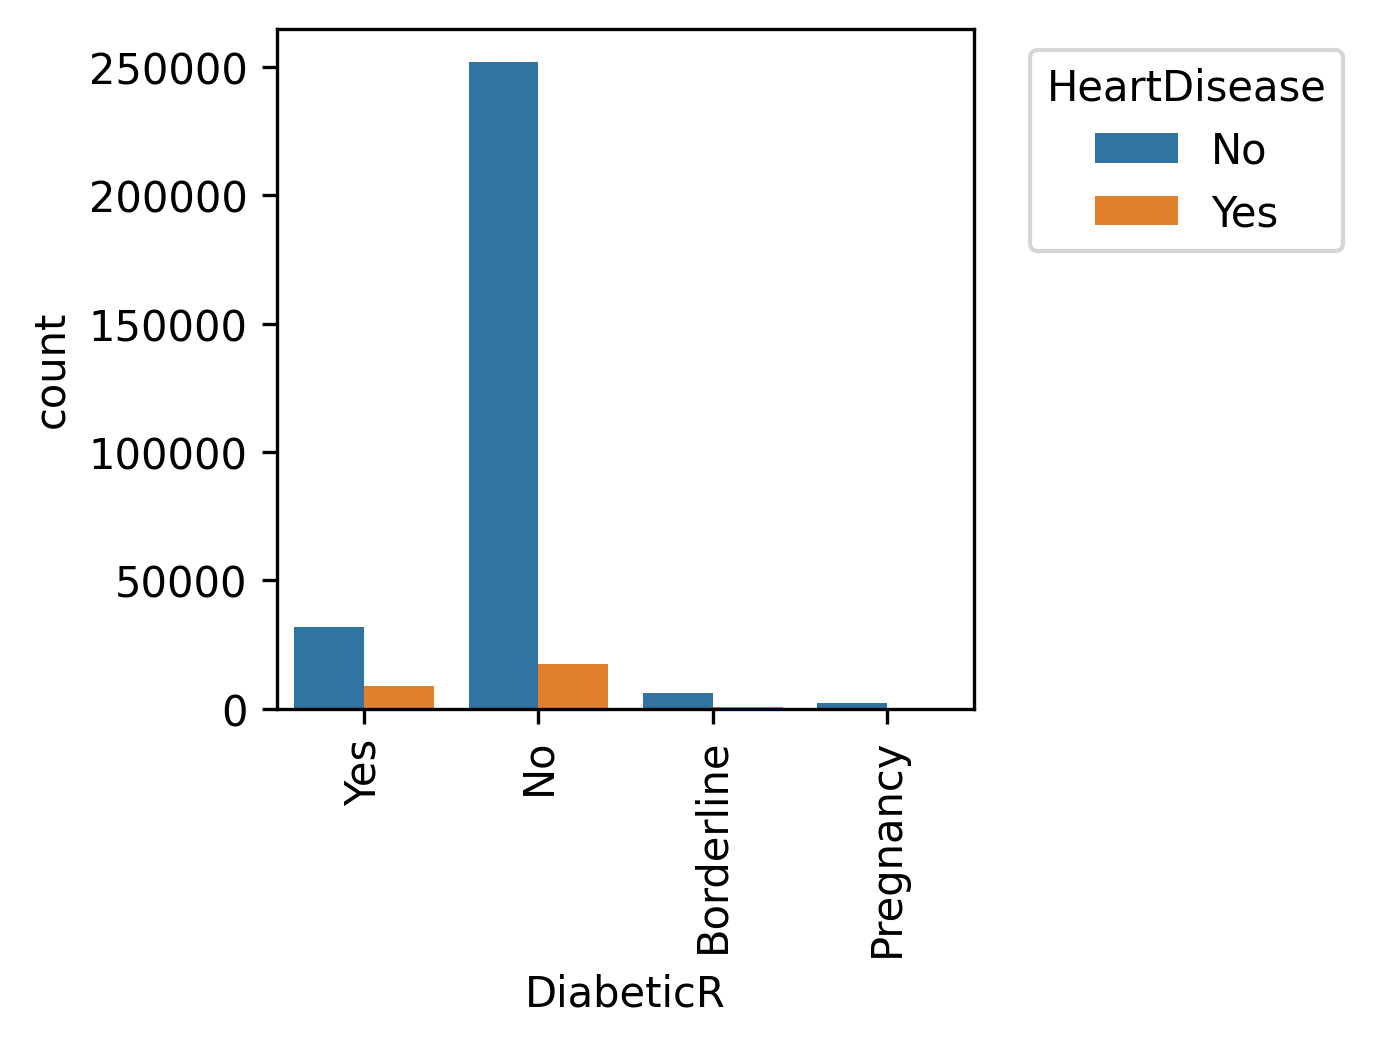

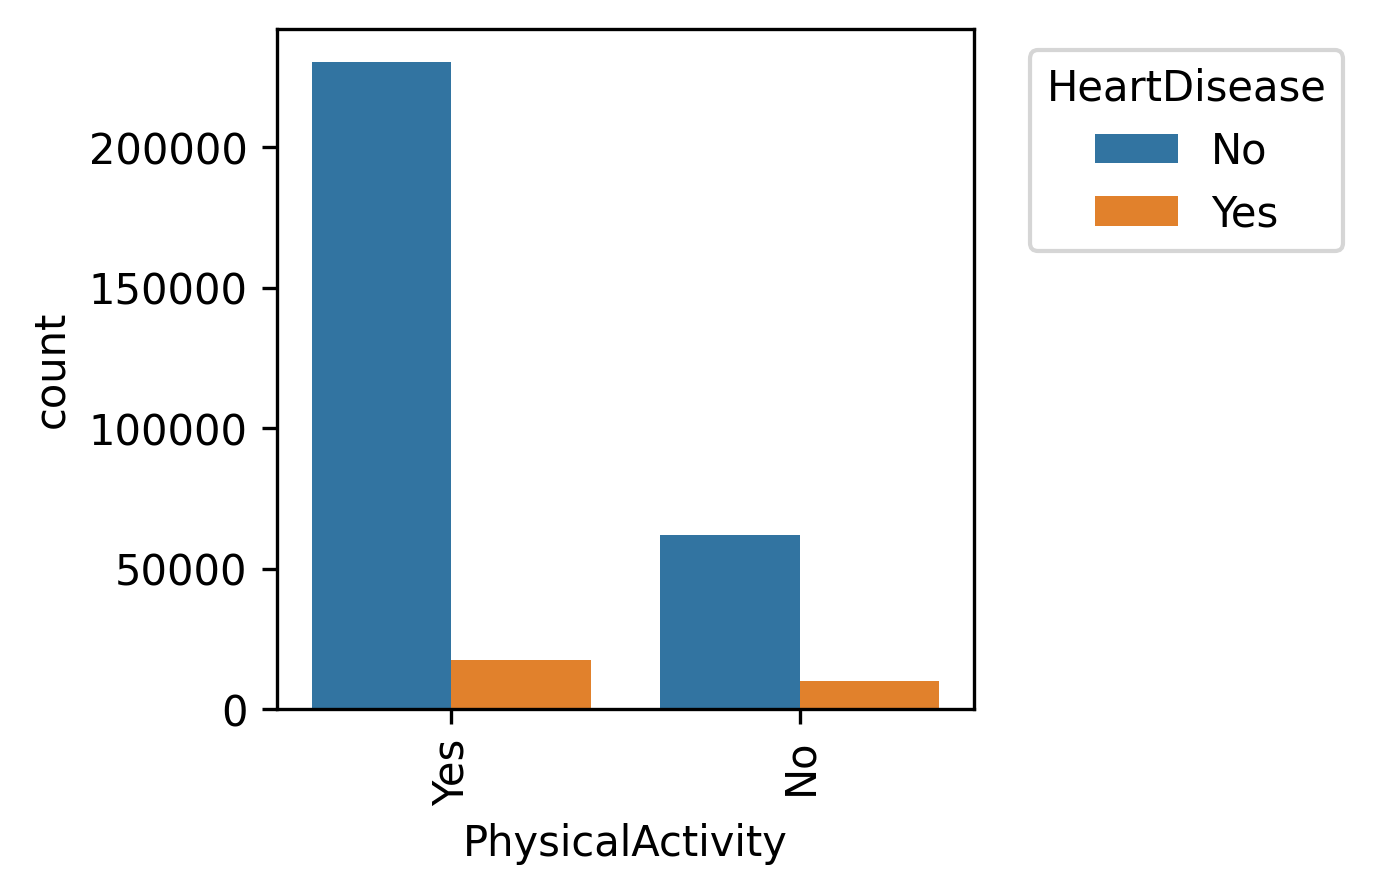

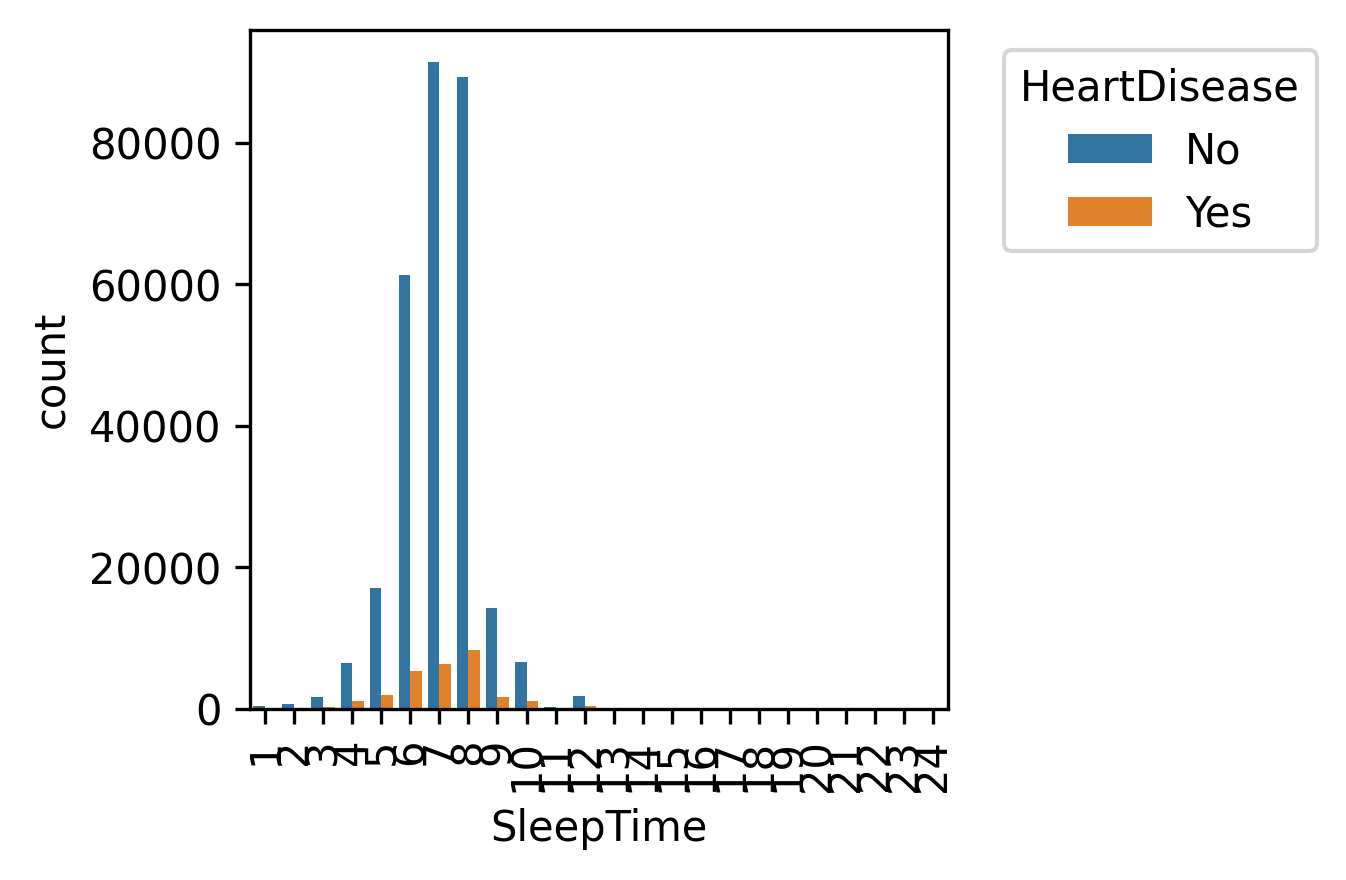

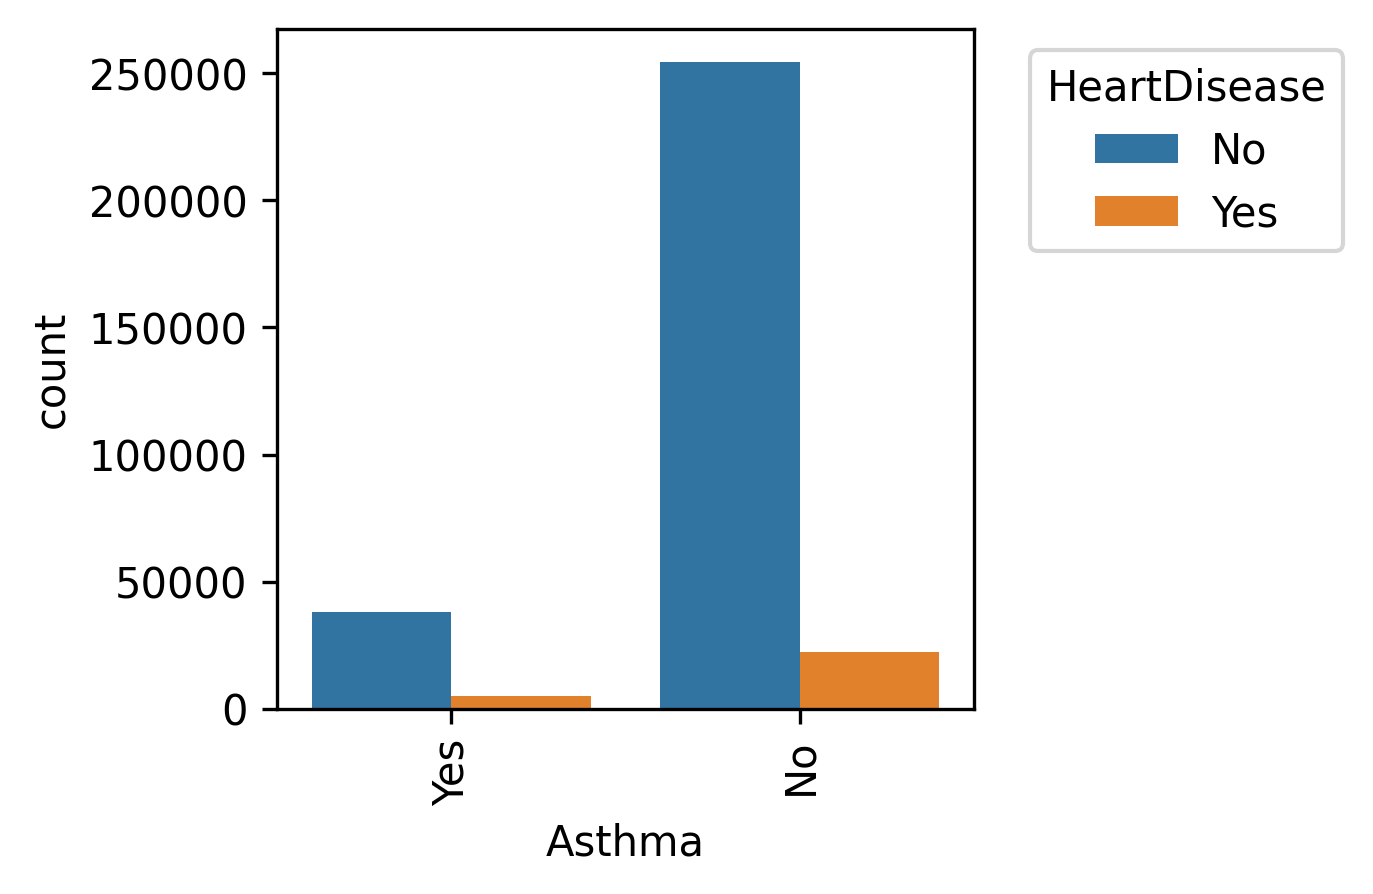

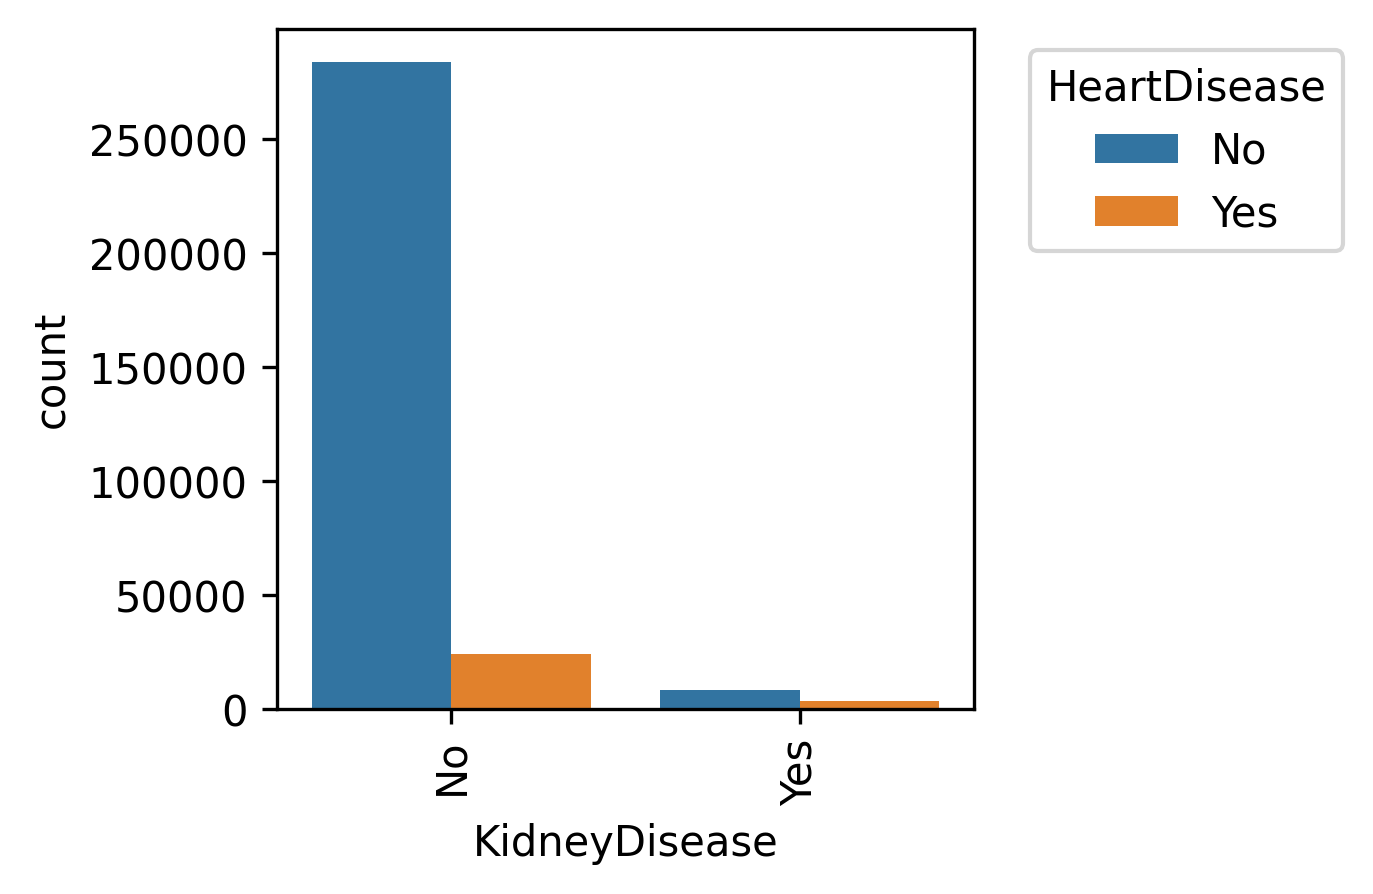

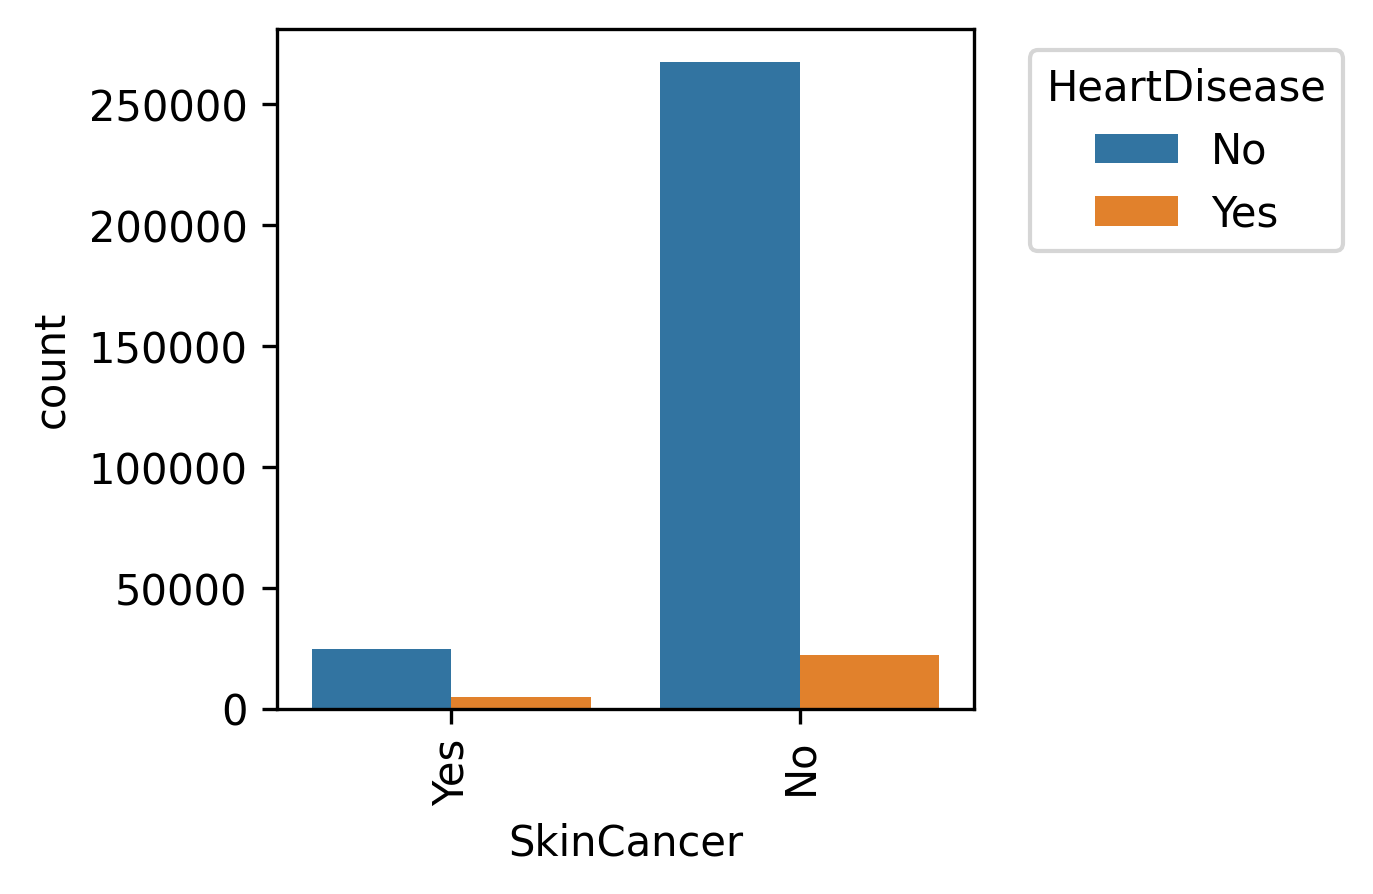

In [59]:

# Change variables to show better in graph 
# Change 24.00 to 24
heart['SleepTime'] = heart['SleepTime'].astype(int)
# Create  RaceR wich reduces labels sizes in Race.
heart['RaceR'] = np.where(heart['Race'] == 'American Indian/Alaskan Native', 'Native',heart['Race'])
# DO the same with  Diabetic

heart['DiabeticR'] = np.where(heart['Diabetic'] == 'No, borderline diabetes', 'Borderline',heart['Diabetic'])

heart['DiabeticR'] = np.where(heart['Diabetic'] == 'Yes (during pregnancy)', 'Pregnancy',heart['DiabeticR'])



# List with desired variables 
cat_var =['DiffWalking',	'Sex'	,'RaceR',	'DiabeticR',	'PhysicalActivity',	'SleepTime', 'Asthma',	'KidneyDisease', 'SkinCancer']

for i in cat_var:
    plt.figure(figsize=(3, 3), dpi=300)
    fig = sns.countplot(data = heart,x = i , hue = "HeartDisease")
    sns.move_legend(fig,"upper left", bbox_to_anchor = (1.05,1))
    plt.xticks(rotation =  90)
    plt.show()